# Sante : 

Pour comprendre comment les facteurs dans le domaine de la santé du pays asiatiques influencent le développement durable et la qualité de vie ,Nous abordons plusieurs questions essentielles :

- Les dépenses en santé contribuent-elles à améliorer l'espérance de vie ?  
- Quels sont les principaux facteurs qui influencent l'espérance de vie dans les pays asiatiques ? 
- L'accès à l'eau potable et le niveau de développement économique influencent-ils le taux de mortalité infantile dans les pays asiatiques ?

L'espérance de vie est un indicateur clé du développement humain. Les dépenses en santé sont souvent considérées comme un levier majeur pour améliorer les soins de santé, réduire les maladies et, en fin de compte, prolonger la vie.  
**objectif** : Notre objectif est d'analyser si une augmentation des dépenses en santé par habitant contribue réellement à améliorer l'espérance de vie dans les pays asiatiques et d'examiner la nature de cette relation.

## 1- La régression polynomiale :  
- **Question** : Les dépenses en santé contribuent-elles à améliorer l'espérance de vie ?
### Indicateurs sélectionnés :  
- **Dépenses en santé**  : Dépenses annuelles en santé par habitant en dollars américains.  
- **Espérance de vie**  : Durée moyenne de vie à la naissance.

### Hypothèse :
- **H₀**  : Les dépenses en santé n'ont pas d'impact significatif sur l'espérance de vie.  
- **H₁**  : Les dépenses en santé ont un impact significatif sur l'espérance de vie, avec une relation non linéaire.

Nous allons maintenant explorer si les données soutiennent l'idée que les dépenses en santé sont un levier efficace pour augmenter l'espérance de vie et si cette relation est sujette à des limites.

In [7]:
import pandas as pd
# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")

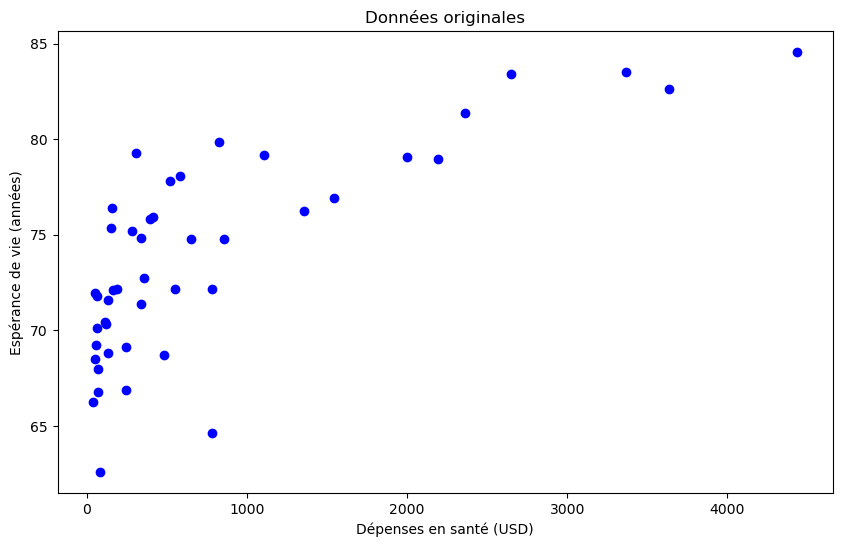

In [9]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Charger les données nettoyées
data = pd.read_csv('data_cleaned.csv')
X = data[['Depenses_en_sante_par_habitant']].values
y = data['Esperance_de_vie'].values

plt.figure(figsize=(10, 6))

# Vérifier la distribution des données
plt.scatter(X, y, color='blue', label='Données réelles')
plt.xlabel('Dépenses en santé (USD)')
plt.ylabel('Espérance de vie (années)')
plt.title('Données originales')
plt.show()




### Remarque
- On observe une augmentation claire de l'espérance de vie avec les dépenses en santé. Cela confirme qu'il existe une relation positive entre les deux variables.
- Les dépenses en santé peuvent avoir un impact significatif sur l'espérance de vie jusqu'à un certain seuil, surtout dans des pays où les services de base sont déjà bien couverts l'augmantation des dépenses en santé  peut avoir un effet limité , donc après quoi cet effet pourrait diminuer ?
- La régression linéaire simple pourrait ne pas capturer la complexité de cette relation.  
- Une régression polynomiale permet de modéliser cette relation avec une courbe, en ajustant le modèle à une forme quadratique ou d'un degré supérieur.  


In [12]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**rappel** :   
==> Normaliser les données :  pour garantir la qualité et la validité de l'analyse.  
La normalisation met les variables sur une échelle similaire, souvent en leur donnant une moyenne de 0 et un écart type de 1.  
La normalisation assure que toutes les caractéristiques ont la même importance initiale et empêche les variables avec des échelles plus grandes de dominer les calculs.  
==> Diviser les données en ensembles d'entraînement:  but de mesurer la performance réelle du modèle et de s'assurer qu'il est capable de généraliser à de nouvelles données, et non seulement de bien s'adapter aux données d'entraînement.  
Prévenir le surapprentissage Lorsque vous entraînez un modèle sur toutes vos données, il peut "mémoriser" les spécificités des données d'entraînement plutôt que d'apprendre les relations sous-jacentes.  
Évaluer la généralisation La performance sur l'ensemble d'entraînement mesure à quel point le modèle est bien ajusté aux données qu'il a vues. et La performance sur l'ensemble de test mesure sa capacité à généraliser. Une grande différence entre les deux performances indique que le modèle est sur-ajusté.  
==> Un modèle sur-ajusté est "trop spécialisé" dans les données d'entraînement et perd sa capacité à généraliser. 

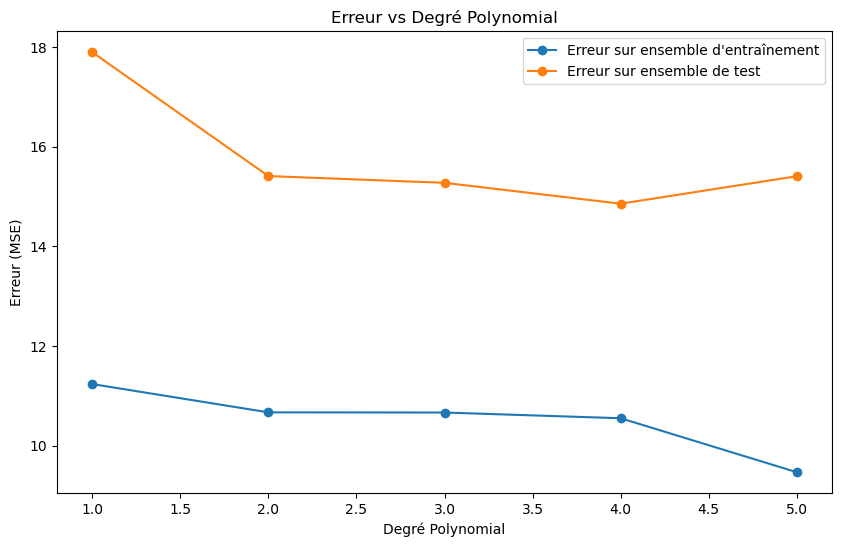

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Tester différents degrés
degrees = range(1, 6)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur ensemble d\'entraînement', marker='o')
plt.plot(degrees, test_errors, label='Erreur sur ensemble de test', marker='o')
plt.title('Erreur vs Degré Polynomial')
plt.xlabel('Degré Polynomial')
plt.ylabel('Erreur (MSE)')
plt.legend()
plt.show()


**Remarque** :
- Courbe d'erreur sur l'ensemble d'entraînement (ligne bleue) :  
On observe une diminution continue de l'erreur (MSE) à mesure que le degré polynomial augmente. Cela est attendu, car des modèles plus complexes
 s'ajustent mieux aux données d'entraînement, capturant plus de détails.  
  
- Courbe d'erreur sur l'ensemble de test (ligne orange) :  
L'erreur diminue initialement jusqu'à un certain degré (autour de 3 ou 4) puis commence à augmenter à nouveau pour un degré supérieur . Cette augmentation de l'erreur sur les données de test, malgré une erreur réduite sur les données d'entraînement, est un signe typique de sur-apprentissage (overfitting).  
  
- Point critique :  
Le degré optimal est celui où l'erreur sur l'ensemble de test est minimale sans augmenter de manière significative l'erreur sur l'ensemble d'entraînement. Ici, le degré 3 semble être un bon compromis.

===>  un modèle polynomial de degré 3. Ce choix permet de capturer la non-linéarité de la relation entre les dépenses en santé et l'espérance de vie tout en minimisant le risque de sur-apprentissage.

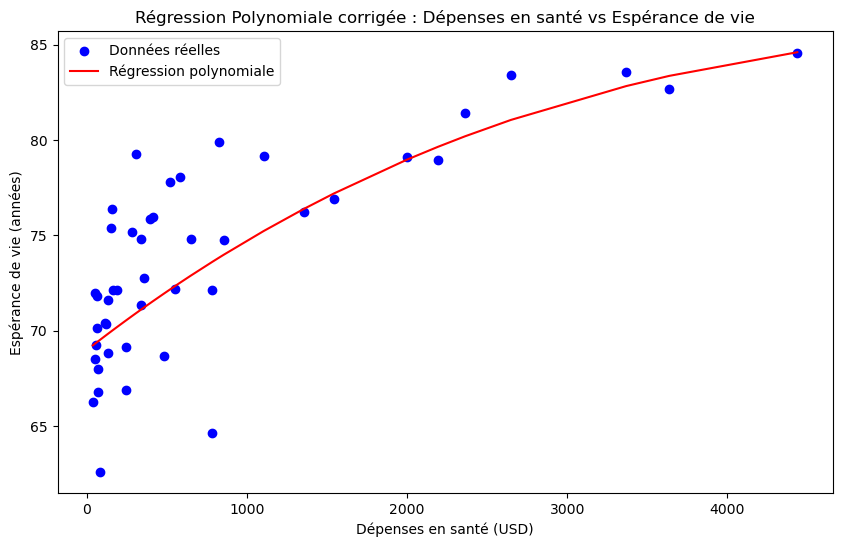

R² (entraînement) : 0.6436


In [18]:


# Appliquer la transformation polynomiale (degré 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Créer et ajuster le modèle de régression polynomiale
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Prédictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Inverser la normalisation pour afficher les axes dans leur unité originale
X_original = scaler.inverse_transform(X_scaled)

# Trier les points pour une courbe plus lisse
sorted_indices = np.argsort(X_original.flatten())
X_sorted = X_original[sorted_indices]
y_pred_sorted = model.predict(poly.transform(scaler.transform(X_sorted)))

plt.scatter(X_original, y, color='blue', label='Données réelles')  # Données réelles
plt.plot(X_sorted, y_pred_sorted, color='red', label='Régression polynomiale')  # Courbe ajustée

plt.title('Régression Polynomiale  : Dépenses en santé vs Espérance de vie')
plt.xlabel('Dépenses en santé (USD)')
plt.ylabel('Espérance de vie (années)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# Calcul des résidus sur l'ensemble d'entraînement
residuals = y_train - y_pred_train
std_dev = np.std(residuals)

# Calcul de R^2 pour les ensembles d'entraînement 
r2_train = r2_score(y_train, y_pred_train)


print(f"R² (entraînement) : {r2_train:.4f}")


**Remarque** :  
- Les points bleus (les données réelles) sont globalement bien alignés avec la courbe rouge (modèle polynomial), ce qui montre une bonne adéquation. Cependant, il y a une certaine dispersion .
- Lorsque les dépenses en santé sont faibles (0 à environ 1500 USD par habitant), l'impact sur l'espérance de vie est plus marqué. Cela suggère que les investissements dans des systèmes de santé de base ont un effet majeur sur l'amélioration de la qualité de vie.
- Dans la zone où les dépenses dépassent 2000 USD, les gains en espérance de vie sont plus modestes, atteignant une sorte de plateau. avec un pont faible .

**Interpretation** :
- Dans les pays asiatiques avec de faibles dépenses en santé, une augmentation de ces dépenses peut considérablement améliorer l'espérance de vie.
- Le modèle polynomial montre une corrélation modérée, avec un 𝑅2=64% , ce qui indique que les dépenses en santé expliquent une partie significative, mais non totale, de la variation de l’espérance de vie.
- Dans les pays où les dépenses sont déjà élevées, les gains supplémentaires en espérance de vie sont limités, soulignant la nécessité d'explorer d'autres leviers, comme l'amélioration des conditions environnementales ou l'éducation à la santé.

- et donc  Pour détermine Quelles sont les principaux facteurs influençant l’espérance de vie dans les pays asiatiques ? , nous avons utilisé une régression Ridge. 
- L'objectif est donc d'identifier les variables explicatives les plus influentes sur l'espérance de vie parmi un ensemble de facteurs, tout en contrôlant les éventuelles corrélations entre ces variables.

## 2- La Régression Ridge :  
- **Question** : Quelles sont les principaux facteurs influençant l’espérance de vie dans les pays asiatiques ?

### Indicateurs sélectionnés :  
- **Variable dépendante (Y) :**
   - Espérance de vie à la naissance.
- **Variables indépendantes (X) :**
  - Dépenses en santé (USD).
  - Accès à l'électricité (%).
  - Accès à l'eau potable (%).
  - Taux de pauvreté (% vivant avec moins de 2,15 $/jour).

- nous devons identifier les autres facteurs susceptibles d'influencer l'espérance de vie. Ces facteurs pourraient inclure des dimensions liées aux infrastructures, aux conditions socio-économiques ou à l'accès aux ressources essentielles, comme l'eau potable ou l'électricité.

In [22]:
import pandas as pd

# Chargement des données
data = pd.read_csv('data_cleaned.csv')

In [24]:
# Sélection des variables
X = data[['Depenses_en_sante_par_habitant', 'Acces_electricite', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Esperance_de_vie']

In [26]:
from sklearn.preprocessing import StandardScaler

# Normalisation des variables indépendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification après normalisation
print("Données normalisées (exemple) :", X_scaled[:5])


Données normalisées (exemple) : [[-6.76993075e-01  3.80125257e-02 -2.09426058e+00 -1.97154738e-16]
 [-2.23804654e-01  4.05703779e-01  7.60257182e-01 -7.16666988e-01]
 [-5.20670620e-01  4.05703779e-01  3.20210509e-01 -1.97154738e-16]
 [ 3.07791817e-01  4.05703779e-01  7.57599596e-01 -1.97154738e-16]
 [-7.05453706e-01 -2.01786118e-01  5.14893567e-01 -1.97154738e-16]]


==>  Normalisation des variables indépendantes : 
- Équilibrer l'impact de la régularisation sur toutes les variables.
- Rendre les coefficients comparables.
- Préserver l'équité entre les variables, indépendamment de leur échelle.

In [29]:
from sklearn.model_selection import train_test_split

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entraînement : (36, 4)
Dimensions de l'ensemble de test : (9, 4)


In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha plus tard

# Entraînement du modèle
ridge.fit(X_train, y_train)
# Prédictions
y_pred = ridge.predict(X_test)


In [37]:
from sklearn.model_selection import GridSearchCV

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Validation croisée avec GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

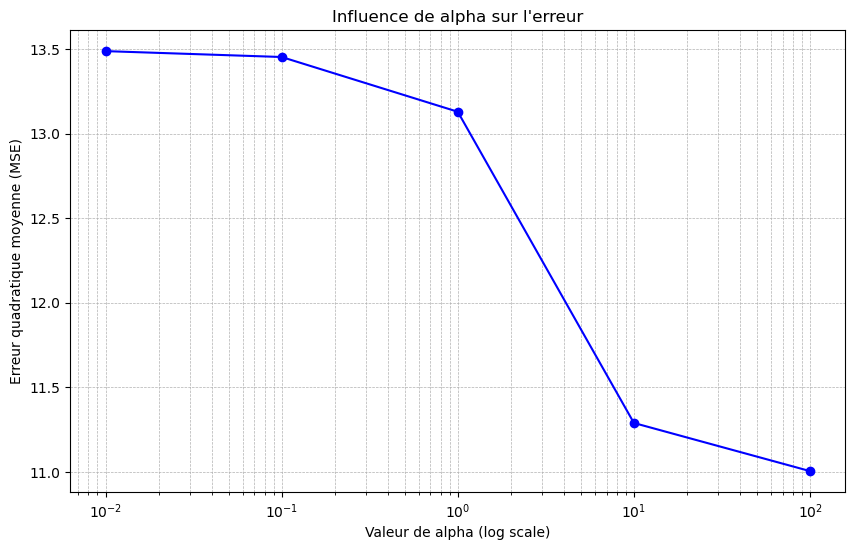

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Liste pour stocker les erreurs
errors = []

# Calcul des erreurs pour chaque alpha
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Tracer les erreurs
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Échelle logarithmique pour mieux visualiser les valeurs d'alpha
plt.xlabel("Valeur de alpha (log scale)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Influence de alpha sur l'erreur")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

**Rappel** : 
- alpha est le paramètre de régularisation. Il contrôle la force de la pénalisation appliquée aux coefficients du modèle. Cette régularisation vise à réduire le risque de sur-ajustement (overfitting) en imposant une contrainte sur la taille des coefficients.
- Lorsque alpha = 0, la régression Ridge devient une régression linéaire classique, sans régularisation. Cela peut entraîner un sur-ajustement si les données sont bruyantes ou si le nombre de variables explicatives est élevé.  
- Lorsque alpha est élevé, le modèle pénalise davantage les grands coefficients, ce qui force certains coefficients à se rapprocher de 0, sans pour autant les annuler complètement.mais peut introduire un biais important (sous-ajustement).

In [47]:
# Meilleur alpha
best_alpha = 100
print(f"Meilleure valeur pour alpha : {best_alpha}")

# Entraînement avec le meilleur alpha
ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)

# Prédictions finales
y_pred_optimized = ridge_optimized.predict(X_test)

# Extraction des coefficients et de leur importance
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': ridge_optimized.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))

Meilleure valeur pour alpha : 100
                         Variable  Coefficient
0  Depenses_en_sante_par_habitant     1.087430
2               Acces_eau_potable     0.765961
1               Acces_electricite     0.450129
3                   Taux_pauvrete    -0.227270


- Les coefficients positifs indiquent des variables ayant une influence positive sur l’espérance de vie. Plus le coefficient est élevé, plus son influence est forte.
- Les coefficients négatifs indiquent des variables ayant une influence négative (ou inverse) sur l’espérance de vie.
- Les coefficients proches de zéro sont fortement atténués par la régularisation Ridge, ce qui signifie que ces variables ne contribuent que très peu à la prédiction.

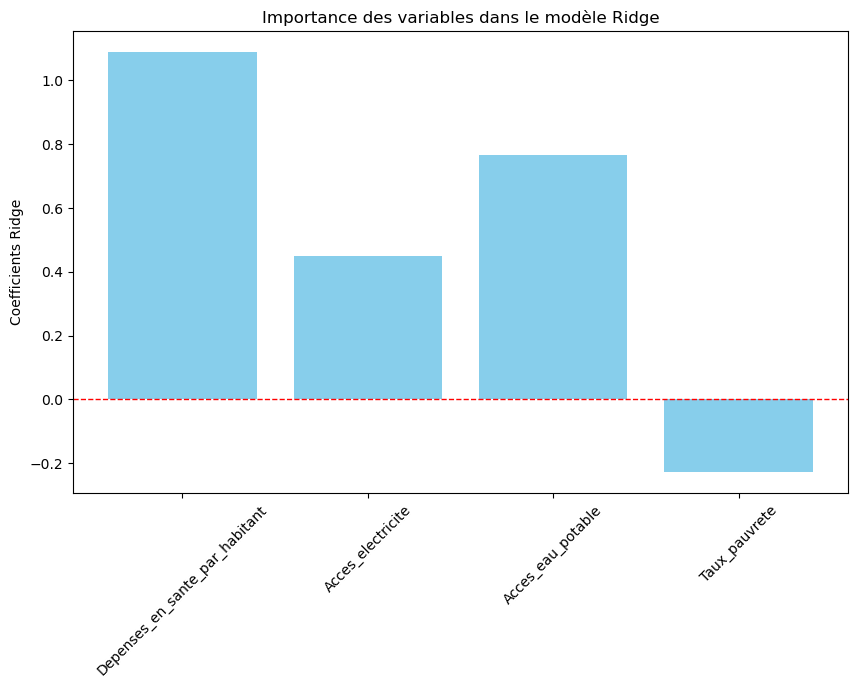

In [49]:
import matplotlib.pyplot as plt

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel("Coefficients Ridge")
plt.title("Importance des variables dans le modèle Ridge")
plt.xticks(rotation=45)
plt.show()

- le taux de pauvreté :Comme prévu, le taux de pauvreté exerce une influence négative sur l'espérance de vie. Cela s'explique par le fait qu'un taux de pauvreté élevé limite l'accès aux services essentiels tels que les soins de santé, l'eau potable et une nutrition adéquate. C

- Dépenses en santé par habitant :Les dépenses en santé par habitant ont le coefficient le plus élevé dans notre modèle. Cela confirme que des investissements plus importants dans les systèmes de santé se traduisent par une amélioration notable de l'espérance de vie. Cela corrobore les conclusions de notre première analyse, en soulignant l'importance cruciale de ce facteur

- Accès à l'eau potable : Un meilleur accès à l'eau potable joue également un rôle significatif. Cela est logique, car une meilleure disponibilité de l'eau potable favorise une meilleure hygiène et réduit les maladies transmissibles, contribuant ainsi à l'amélioration de la santé publique et, par conséquent, à une espérance de vie plus élevée

- Accès à l'électricité : Bien que l'effet soit moins marqué, l'accès à l'électricité a un impact positif sur l'espérance de vie. Ce lien peut être indirect, l'électricité permettant d'améliorer les infrastructures, comme les hôpitaux, et les conditions de vie générales

**Conclusion** :
Ces résultats montrent que plusieurs facteurs interagissent pour influencer l'espérance de vie. Si les dépenses en santé restent le levier le plus puissant, d'autres éléments, comme l'accès à l'eau potable et l'amélioration des conditions socio-économiques, méritent une attention particulière. Cela justifie une approche multidimensionnelle pour améliorer durablement l'espérance de vie dans les pays asiatiques.

## 3. ANOVA :  
**Question** :  
L'accès à l'eau potable et le niveau de développement économique influencent-ils le taux de mortalité infantile dans les pays asiatiques ? 

**Variable** :  
Variable dépendante (Y) : Taux_mortalite_infantile : Nombre de décès pour 1 000 naissances vivantes.
Facteurs indépendants (X) : Acces_eau_potable_categorise et Niveau_de_developpement
  
**Hypothèses** :  
- Hypothèse nulle (H₀) :  
  Les moyennes des taux de mortalité infantile sont identiques entre les niveaux d'accès à l'eau potable.  
  Les moyennes des taux de mortalité infantile sont identiques entre les niveaux de développement économique.  
  Il n’y a pas d’interaction entre les deux facteurs.  
    
- Hypothèse alternative (H₁) :    
  Les moyennes des taux de mortalité infantile diffèrent entre les niveaux d'accès à l'eau potable.  
  Les moyennes des taux de mortalité infantile diffèrent entre les niveaux de développement économique.  
  Il existe une interaction entre les deux facteurs, c’est-a-dire que l’effet d’un facteur depend de l’autre.  

In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")


# Vérifier les catégories
print("Distribution des catégories d'accès à l'eau potable :")
print(data['Acces_eau_potable_categorise'].value_counts())
print("\nDistribution des catégories de développement économique :")
print(data['Niveau_de_developpement'].value_counts())

Distribution des catégories d'accès à l'eau potable :
Acces_eau_potable_categorise
Élevé     37
Modéré     5
Faible     3
Name: count, dtype: int64

Distribution des catégories de développement économique :
Niveau_de_developpement
Intermédiaire    18
Faible           14
Élevé            13
Name: count, dtype: int64


**Acces_eau_potable_categorise**:  
- Élevé: La majorité des pays asiatiques étudiés bénéficient d'un accès élevé à l'eau potable
- Modéré: Ce groupe est sous-représenté, ce qui peut limiter la robustesse des résultats pour cette catégorie.
- Faible: Très peu de pays sont dans cette catégorie, ce qui pourrait influencer la validité statistique de cette comparaison.  
**Niveau de développement économique**:  
- Élevé: Les pays hautement développés pourraient servir de référence pour évaluer l'impact des infrastructures sur la mortalité infantile.
- Modéré: Cette catégorie est la plus représentée, offrant des données potentiellement plus fiables pour cette comparaison.
- Faible: Ce groupe est bien représenté et pourrait être important pour comprendre les défis des pays en développement.  
**Probleme :**
- Le déséquilibre dans les effectifs des catégories d'accès à l'eau potable (37 pour "Élevé", mais seulement 3 pour "Faible") peut affecter la puissance statistique de l'ANOVA.
Les résultats pour les groupes "Modéré" et "Faible" pourraient être moins fiables.

Pour que l'ANOVA soit fiable, elle suppose que les variances intragroupes soient homogènes, donc nous utilisons le test de Levene. Ce test permet de vérifier si les variances des différents groupes sont statistiquement égales.

In [47]:
from scipy.stats import levene
import pandas as pd

# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")

# Filtrer les données nécessaires
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Grouper les données par les catégories des deux facteurs
group1 = anova_data[anova_data['Acces_eau_potable_categorise'] == 'Faible']['Taux_mortalite_infantile']
group2 = anova_data[anova_data['Acces_eau_potable_categorise'] == 'Modéré']['Taux_mortalite_infantile']
group3 = anova_data[anova_data['Acces_eau_potable_categorise'] == 'Élevé']['Taux_mortalite_infantile']

# Effectuer le test de Levene pour homogénéité des variances
stat, p_value = levene(group1, group2, group3)

# Résultat du test
print("Statistique de Levene :", stat)
print("P-valeur :", p_value)

if p_value > 0.05:
    print("Les variances sont homogènes (p > 0.05). L'hypothèse d'homogénéité des variances est respectée.")
else:
    print("Les variances ne sont pas homogènes (p <= 0.05). L'hypothèse d'homogénéité des variances est violée.")


Statistique de Levene : 0.3986187876161161
P-valeur : 0.6737590454503444
Les variances sont homogènes (p > 0.05). L'hypothèse d'homogénéité des variances est respectée.


**rappel :**  
- Variance intragroupe :C'est la variabilité des données à l'intérieur de chaque groupe. Elle mesure à quel point les observations d'un groupe donné s'écartent de la moyenne de ce groupe. exemple : Pour les groupes "Faible", "Modéré" et "Élevé" d'accès à l'eau potable, la variance intragroupe examine comment les taux de mortalité infantile varient au sein de chaque groupe.
- Variance intergroupe :C'est la variabilité des données entre les moyennes des groupes. Elle mesure les différences entre les moyennes des différents groupes par rapport à la moyenne globale. exemple : Elle examine les différences dans les moyennes des taux de mortalité infantile entre les groupes "Faible", "Modéré" et "Élevé".
- Le test de Levene compare les variances intragroupe de différents groupes pour voir si elles sont équivalentes.

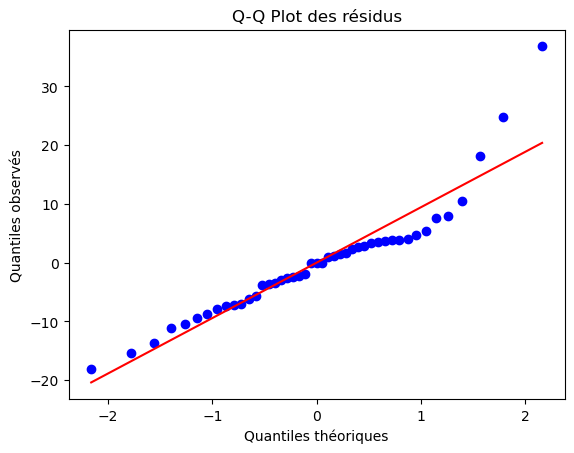

P-valeur : 0.0007319269538743747
Les résidus suivent une distribution normale (p < 0.05).


In [61]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")

# Construire le modèle ANOVA
model = ols("Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)", data=data).fit()

# Extraire les résidus
residuals = model.resid

# Création du Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des résidus")  # Titre en français
plt.xlabel("Quantiles théoriques")  # Label de l'axe des abscisses
plt.ylabel("Quantiles observés")    # Label de l'axe des ordonnées
plt.show()

# Vérification de la normalité des résidus

shapiro_test = stats.shapiro(residuals)
print("P-valeur :", shapiro_test.pvalue)

if shapiro_test.pvalue < 0.05:
    print("Les résidus suivent une distribution normale (p < 0.05).")
else:
    print("Les résidus ne suivent pas une distribution normale (p >= 0.05).")


 le graphique de normalité des résidus compare les quantiles observés aux quantiles d'une distribution normale théorique.

 les points bleus s'alignent sur la ligne rouge, cela indique que les résidus suivent une distribution normale

In [76]:
# Préparer les données pour l'ANOVA
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Ajuster le modèle ANOVA avec interaction
model = ols(
    'Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)', 
    data=anova_data
).fit()

# Générer le tableau ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le tableau ANOVA
# print("\nTableau ANOVA :")
# print(anova_table)

### Tableau ANOVA

| Source de variation                                | Sum of Square- sc S) | df  | F-statistic       | P-value       |
|----------------------------------------------------|----------------------|------|-------------------|---------------|
| Accès à l'eau potable (`Acces_eau_potable_categorise`) | 5 177.134            | 2    | 24.09532          | 0.000017      |
| Niveau de développement (`Niveau_de_developpement`)  | 2.376e-12            | 2    | 1.105773e-14      | 1.000000      |
| Interaction : Accès à l'eau potable × Niveau de développement | 4 732.360            | 4    | 11.01263          | 0.000022      |
| Résidus                                            | 4 189.781            | 39   | -                 | -             |


**Interprétation des résultats** :  
- Effet de l'accès à l'eau potable :   
L'accès à l'eau potable a un effet statistiquement significatif sur le taux de mortalité infantile (p < 0.05). Cela signifie que les moyennes des taux de mortalité infantile diffèrent entre les groupes définis par les catégories d'accès à l'eau potable (Faible, Modéré, Élevé). Cela suggère que l'amélioration de l'accès à l'eau potable pourrait jouer un rôle important dans la réduction de la mortalité infantile.
- Effet du niveau de développement :  
Le niveau de développement économique n'a pas d'effet significatif sur le taux de mortalité infantile (p > 0.05). Cela indique que, dans ce modèle particulier, les différences de mortalité infantile ne peuvent pas être attribuées uniquement au niveau de développement économique.
- Interaction entre les deux facteurs :  
L'interaction entre l'accès à l'eau potable et le niveau de développement est statistiquement significative (p < 0.05). Cela signifie que l'effet de l'accès à l'eau potable sur la mortalité infantile varie selon le niveau de développement économique. En d'autres termes, l'impact de l'accès à l'eau potable sur la mortalité infantile n'est pas uniforme entre les pays à différents niveaux de développement. Par exemple, les pays fortement développés pourraient mieux capitaliser sur un meilleur accès à l'eau potable que les pays moins développés.

## Conclusion générale : 
Notre analyse souligne l'importance d'une stratégie intégrée pour améliorer la santé publique. Les dépenses en santé augmentent l'espérance de vie, mais leur efficacité diminue après avoir satisfait les besoins fondamentaux. Parallèlement, l'accès à l'eau potable joue un rôle crucial en influençant positivement l'espérance de vie et en réduisant significativement la mortalité infantile. Ces résultats montrent que la santé est liée aux infrastructures de base et nécessitent des efforts conjoints en matière de santé, d'infrastructures et de politiques pour réduire les inégalités et améliorer durablement les conditions de vie.